In [1]:
import pandas as pd

df = pd.read_csv("Hotel_reservations.csv")

# Convert arrival_year, arrival_month, and arrival_date into a single datetime column
df['arrival_datetime'] = pd.to_datetime(
    df['arrival_year'].astype(str) + '-' + df['arrival_month'].astype(str) + '-' + df['arrival_date'].astype(str),
    errors='coerce'
)

# Check if the datetime conversion was successful
df['arrival_datetime']


0       2017-10-02
1       2018-11-06
2       2018-02-28
3       2018-05-20
4       2018-04-11
           ...    
36270   2018-08-03
36271   2018-10-17
36272   2018-07-01
36273   2018-04-21
36274   2018-12-30
Name: arrival_datetime, Length: 36275, dtype: datetime64[ns]

In [2]:
df['arrival_datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 36275 entries, 0 to 36274
Series name: arrival_datetime
Non-Null Count  Dtype         
--------------  -----         
36238 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 283.5 KB


In [3]:
data = df.dropna()

In [4]:
data

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

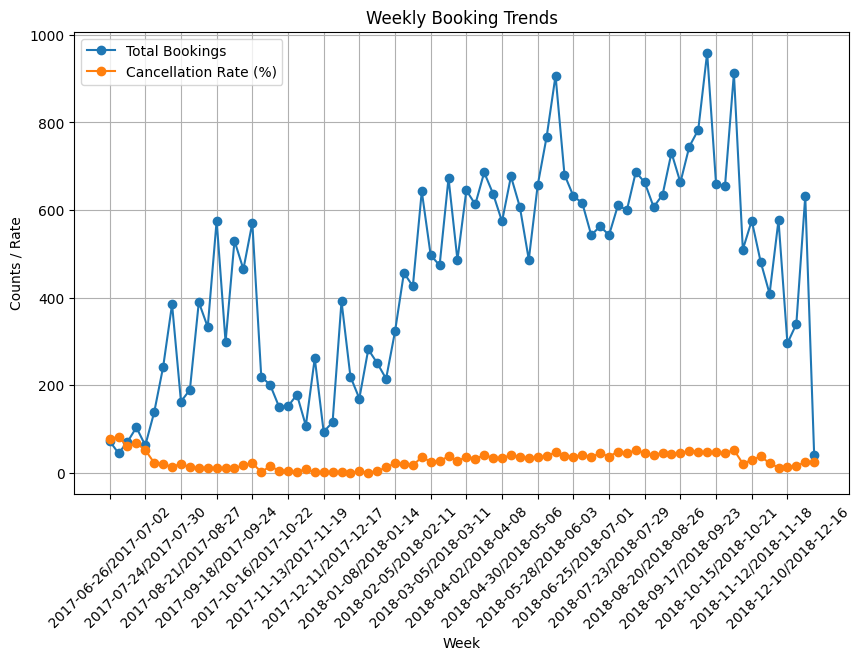

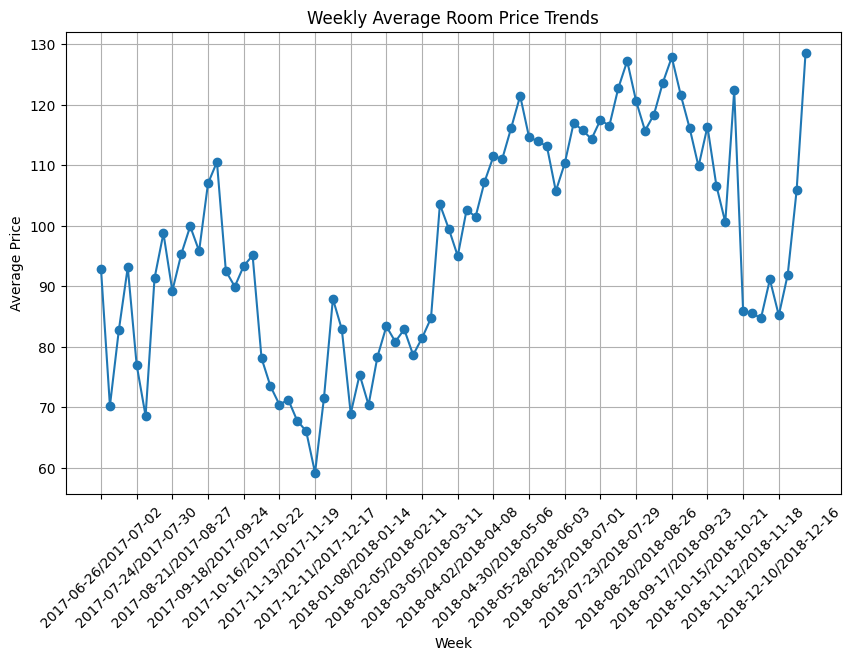

In [5]:
import matplotlib.pyplot as plt

# Aggregate bookings and cancellations by week
df['week'] = df['arrival_datetime'].dt.to_period('W')
weekly_data = df.groupby('week').agg(
    total_bookings=('booking_status', 'size'),
    canceled_bookings=('booking_status', lambda x: (x == 'Canceled').sum()),
    avg_price_per_room=('avg_price_per_room', 'mean'),
    avg_lead_time=('lead_time', 'mean')
).reset_index()

# Calculate cancellation rates
weekly_data['cancellation_rate'] = (weekly_data['canceled_bookings'] / weekly_data['total_bookings']) * 100


# Visualize weekly trends
plt.figure(figsize=(10, 6))
plt.plot(weekly_data['week'].astype(str), weekly_data['total_bookings'], label='Total Bookings', marker='o')
plt.plot(weekly_data['week'].astype(str), weekly_data['cancellation_rate'], label='Cancellation Rate (%)', marker='o')
plt.title('Weekly Booking Trends')
plt.xlabel('Week')
plt.ylabel('Counts / Rate')
plt.xticks(weekly_data['week'].astype(str)[::4], rotation=45)  # Show every 4th week
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Visualize room price trends
plt.figure(figsize=(10, 6))
plt.plot(weekly_data['week'].astype(str), weekly_data['avg_price_per_room'], label='Average Price Per Room', marker='o')
plt.title('Weekly Average Room Price Trends')
plt.xlabel('Week')
plt.ylabel('Average Price')
plt.xticks(weekly_data['week'].astype(str)[::4], rotation=45)  # Show every 4th week
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [6]:
data['week'] = data['arrival_datetime'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_data = data.groupby('week').size().to_frame(name='total_bookings').reset_index()

C:\Users\ashwi\AppData\Local\Temp\ipykernel_11688\320368739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week'] = data['arrival_datetime'].dt.to_period('W').apply(lambda r: r.start_time)


In [7]:
weekly_data['week'] = pd.to_datetime(weekly_data['week'])

In [8]:
weekly_data.sort_values('week', inplace=True)

In [9]:
weekly_data

week  total_bookings
0  2017-06-26              73
1  2017-07-03              45
2  2017-07-10              71
3  2017-07-17             104
4  2017-07-24              63
..        ...             ...
75 2018-12-03             577
76 2018-12-10             296
77 2018-12-17             340
78 2018-12-24             632
79 2018-12-31              40

[80 rows x 2 columns]

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
import numpy as np

In [11]:
train_size = int(len(weekly_data) * 0.8)
train, test = weekly_data.iloc[:train_size], weekly_data.iloc[train_size:]


In [12]:
sarimax_model = SARIMAX(
    train['total_bookings'],
    order=(1, 1, 1),  # ARIMA order (p, d, q)
    seasonal_order=(1, 1, 1, 52),  # Seasonal order (P, D, Q, s) with yearly seasonality (52 weeks)
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [13]:
sarimax_model.summary()

C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tools\eval_measures.py:414: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tools\eval_measures.py:439: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3016: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:472: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     total_bookings   No. Observations:                   64
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                   0.000
Date:                            Wed, 11 Dec 2024   AIC                             10.000
Time:                                    00:09:03   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 64                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3998         -0        inf      0.000      -0.400      -0.400
ma.L1          0.1188         -0       -inf      0.000       0.119       0.119
ar.S.L52            0         -0        nan        nan           0           0
ma.S.L52            0         -0        nan        nan           0           0
sigma2      1.477e+04         -0       -inf      0.000    1.48e+04    1.48e+04
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [14]:
forecast_steps = len(test) + 26
forecast = sarimax_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [15]:
forecast_index = pd.date_range(start=test['week'].iloc[0], periods=forecast_steps, freq='W')

In [16]:
forecast_mean.index = forecast_index
forecast_conf_int.index = forecast_index

In [17]:
forecast_index_numeric = forecast_index.to_numpy()
forecast_conf_int_numeric = forecast_conf_int.to_numpy()


C:\Users\ashwi\AppData\Local\Temp\ipykernel_11688\1804674043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['week'] = pd.to_datetime(train['week'])
C:\Users\ashwi\AppData\Local\Temp\ipykernel_11688\1804674043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['week'] = pd.to_datetime(test['week'])


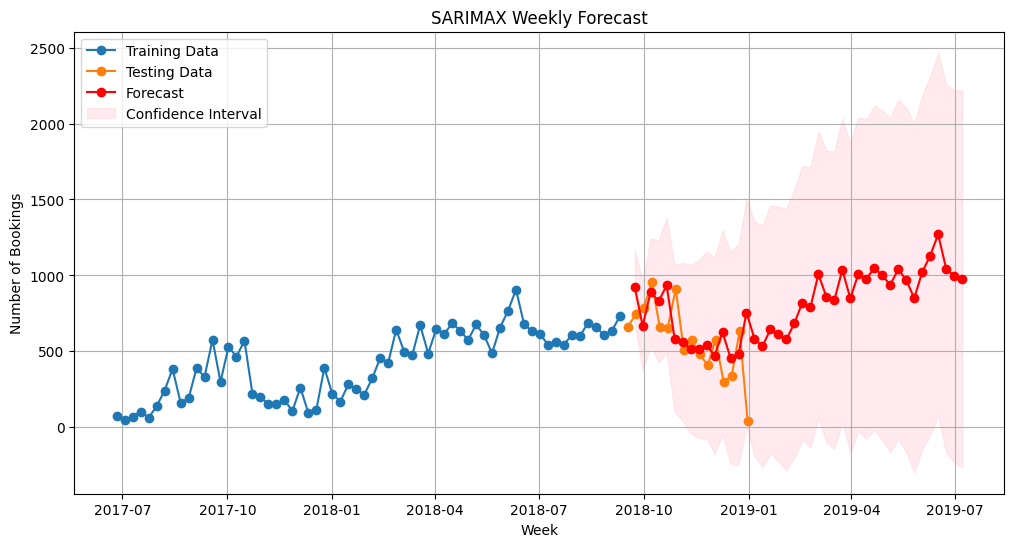

In [18]:

train['week'] = pd.to_datetime(train['week'])
test['week'] = pd.to_datetime(test['week'])


plt.figure(figsize=(12, 6))
plt.plot(train['week'], train['total_bookings'], label='Training Data', marker='o')
plt.plot(test['week'], test['total_bookings'], label='Testing Data', marker='o')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red', marker='o')
plt.fill_between(
    forecast_index,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color='pink', alpha=0.3, label='Confidence Interval'
)
plt.title("SARIMAX Weekly Forecast")
plt.xlabel("Week")
plt.ylabel("Number of Bookings")
plt.legend()
plt.grid()
plt.show()
